In [169]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV,cross_val_score
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import scipy

from sklearn.metrics.regression import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LinearRegression, LassoCV, Lasso
from sklearn.ensemble import RandomForestRegressor

%matplotlib inline
from matplotlib import pyplot as plt

In [120]:
data = pd.read_csv('BlackFriday.csv')


In [121]:
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [122]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
User_ID                       537577 non-null int64
Product_ID                    537577 non-null object
Gender                        537577 non-null object
Age                           537577 non-null object
Occupation                    537577 non-null int64
City_Category                 537577 non-null object
Stay_In_Current_City_Years    537577 non-null object
Marital_Status                537577 non-null int64
Product_Category_1            537577 non-null int64
Product_Category_2            370591 non-null float64
Product_Category_3            164278 non-null float64
Purchase                      537577 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


In [123]:
data.isna().any()

User_ID                       False
Product_ID                    False
Gender                        False
Age                           False
Occupation                    False
City_Category                 False
Stay_In_Current_City_Years    False
Marital_Status                False
Product_Category_1            False
Product_Category_2             True
Product_Category_3             True
Purchase                      False
dtype: bool

In [124]:
print('Product_Category_2', data['Product_Category_2'].unique())

Product_Category_2 [nan  6. 14.  2.  8. 15. 16. 11.  5.  3.  4. 12.  9. 10. 17. 13.  7. 18.]


In [125]:
data.fillna(value=0,inplace=True)
data["Product_Category_2"] = data["Product_Category_2"].astype(int)
data["Product_Category_3"] = data["Product_Category_3"].astype(int)

In [126]:
print('Product_Category_1', data['Product_Category_1'].unique())

Product_Category_1 [ 3  1 12  8  5  4  2  6 14 11 13 15  7 16 18 10 17  9]


In [127]:
data.drop(columns = ["User_ID","Product_ID"],inplace=True)

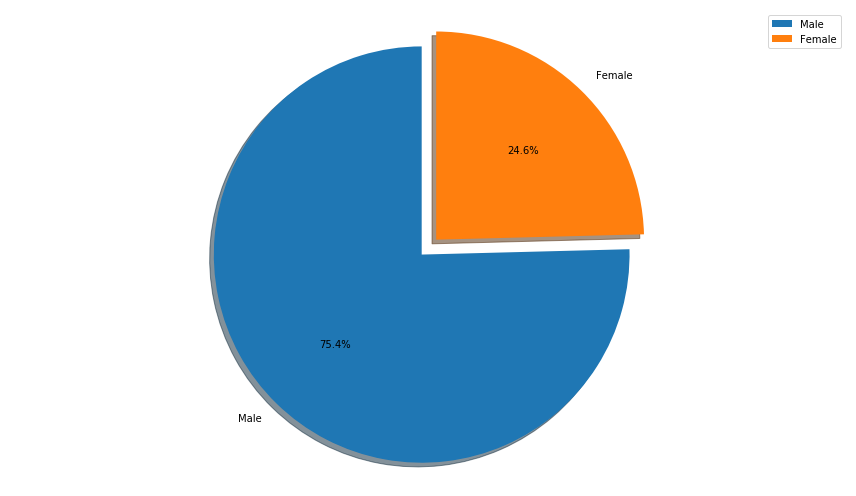

In [128]:
explode = (0.1,0)  
fig1, ax1 = plt.subplots(figsize=(12,7))
ax1.pie(data['Gender'].value_counts(), explode=explode,labels=['Male','Female'], autopct='%1.1f%%',
        shadow=True, startangle=90)

ax1.axis('equal')  
plt.tight_layout()
plt.legend()
plt.show()

In [129]:
sortAgedata = data.reset_index().sort_values(by=['Age'])

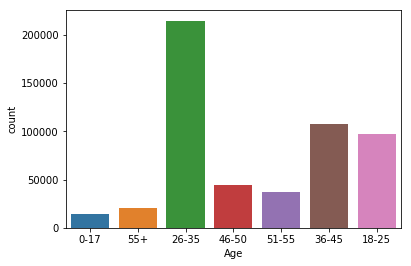

In [130]:
sns.countplot(data['Age'])

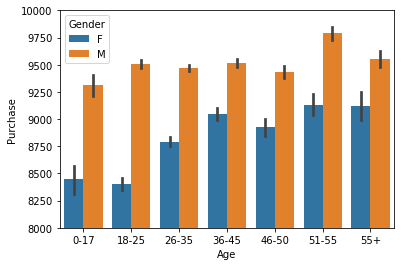

In [131]:


ax = sns.barplot(data=sortAgedata,x="Age",y="Purchase",hue="Gender")

plt.axis(ymin=8000,ymax=10000)
plt.show()

In [132]:
tempdata = data
tempdata['Gender_Marital_Status'] = tempdata.apply(lambda x:'%s_%s' % (x['Gender'],x['Marital_Status']),axis=1)
print(tempdata['Gender_Marital_Status'].unique())

['F_0' 'M_0' 'M_1' 'F_1']


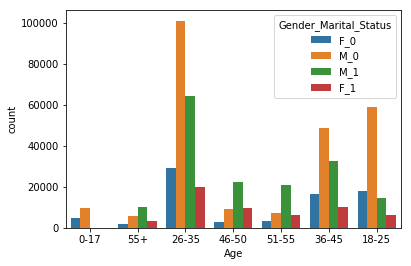

In [133]:
sns.countplot(data['Age'],hue=tempdata['Gender_Marital_Status'])

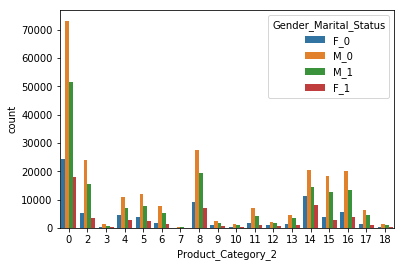

In [134]:
sns.countplot(data['Product_Category_2'],hue=tempdata['Gender_Marital_Status'])

In [158]:
newdata = pd.concat([data, 
                     pd.get_dummies(data['Gender'],prefix="Gender"),
                     pd.get_dummies(data['Age'],prefix="Age"),
                     pd.get_dummies(data['Occupation'],prefix="Occupation"),
                     pd.get_dummies(data['City_Category'],prefix="City_Category"),
                     pd.get_dummies(data['Stay_In_Current_City_Years'],prefix="Stay_In_Current_City_Years"),
                     pd.get_dummies(data['Marital_Status'],prefix="Marital_Status"),
                     pd.get_dummies(data['Product_Category_1'],prefix="Product_Category_1"),
                     pd.get_dummies(data['Product_Category_2'],prefix="Product_Category_2"),
                     pd.get_dummies(data['Product_Category_3'],prefix="Product_Category_3")
                    ],
                   axis=1)

In [159]:
newdata.drop(['Gender','Age','Occupation','Stay_In_Current_City_Years','Marital_Status','City_Category','Product_Category_1',
            'Product_Category_2','Product_Category_3' ],
            axis=1, inplace=True)

In [160]:
newdata.drop(['Gender_Marital_Status'],
            axis=1, inplace=True)

In [161]:
independent_columns_names = newdata.columns.values
independent_columns_names = [x for x in newdata if x!= 'Purchase']
independent_columns_names

['Gender_F',
 'Gender_M',
 'Age_0-17',
 'Age_18-25',
 'Age_26-35',
 'Age_36-45',
 'Age_46-50',
 'Age_51-55',
 'Age_55+',
 'Occupation_0',
 'Occupation_1',
 'Occupation_2',
 'Occupation_3',
 'Occupation_4',
 'Occupation_5',
 'Occupation_6',
 'Occupation_7',
 'Occupation_8',
 'Occupation_9',
 'Occupation_10',
 'Occupation_11',
 'Occupation_12',
 'Occupation_13',
 'Occupation_14',
 'Occupation_15',
 'Occupation_16',
 'Occupation_17',
 'Occupation_18',
 'Occupation_19',
 'Occupation_20',
 'City_Category_A',
 'City_Category_B',
 'City_Category_C',
 'Stay_In_Current_City_Years_0',
 'Stay_In_Current_City_Years_1',
 'Stay_In_Current_City_Years_2',
 'Stay_In_Current_City_Years_3',
 'Stay_In_Current_City_Years_4+',
 'Marital_Status_0',
 'Marital_Status_1',
 'Product_Category_1_1',
 'Product_Category_1_2',
 'Product_Category_1_3',
 'Product_Category_1_4',
 'Product_Category_1_5',
 'Product_Category_1_6',
 'Product_Category_1_7',
 'Product_Category_1_8',
 'Product_Category_1_9',
 'Product_Category

In [163]:
X = newdata[independent_columns_names]
y = newdata['Purchase']

In [215]:
y = newdata['Purchase']

X_train, X_holdout, y_train, y_holdout = train_test_split(newdata.drop('Purchase', axis=1), y, test_size=0.3,
                                                         random_state=17)

In [217]:
%%time
model1 = Ridge(alpha=1.0 , random_state = 1)
model1.fit(X_train_scaled,y_train)

Wall time: 1.32 s


In [218]:
%%time
from math import sqrt
train_preds1 = model1.predict(X_train)
valid_preds1 = model1.predict(X_holdout)

print('Ошибка на трейне',sqrt(mean_squared_error(y_train, train_preds1)))
print('Ошибка на тесте',sqrt(mean_squared_error(y_holdout, valid_preds1)))

Ошибка на трейне 4153.8469126336095
Ошибка на тесте 4147.778991800271
Wall time: 371 ms


In [219]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [223]:
print("Mean squared error (train): %.3f" % sqrt(mean_squared_error(y_train, linreg.predict(X_train))))
print("Mean squared error (test): %.3f" % sqrt(mean_squared_error(y_holdout, linreg.predict(X_holdout))))

Mean squared error (train): 2990.355
Mean squared error (test): 2996.577


In [224]:
%%time
forest = RandomForestRegressor(random_state=17)
forest.fit(X_train, y_train)

Wall time: 53 s


In [226]:
print("Mean squared error (train): %.3f" % sqrt(mean_squared_error(y_train, forest.predict(X_train))))
print("Mean squared error (test): %.3f" % sqrt(mean_squared_error(y_holdout, forest.predict(X_holdout))))


Mean squared error (train): 2312.765
Mean squared error (test): 3092.443


In [229]:
%%time
forest_params = {'max_depth': list(range(10, 25)), 
                 'min_samples_leaf': list(range(1, 8)),
                 'max_features': list(range(6,12))}

locally_best_forest = GridSearchCV(forest, forest_params,cv=5, n_jobs=-1, verbose=True)
locally_best_forest.fit(X_train, y_train)

Fitting 5 folds for each of 630 candidates, totalling 3150 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   48.3s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  8.9min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed: 17.2min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed: 28.9min
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed: 42.8min
[Parallel(n_jobs=-1)]: Done 2434 tasks      | elapsed: 554.1min
[Parallel(n_jobs=-1)]: Done 3150 out of 3150 | elapsed: 576.2min finished


Wall time: 9h 36min 21s


In [232]:
print("Best params:", locally_best_forest.best_params_)
print("Best cross validaton score", locally_best_forest.best_score_)

Best params: {'max_depth': 24, 'max_features': 11, 'min_samples_leaf': 2}
Best cross validaton score 0.654729816448477


In [263]:
y_pred = locally_best_forest.predict(X_train)

In [270]:
%%time
from math import sqrt

train_y_pred = locally_best_forest.predict(X_train)
valid_y_pred = locally_best_forest.predict(X_holdout)


print('Ошибка на трейне',sqrt(mean_squared_error(y_train, train_y_pred)))
print('Ошибка на тесте',sqrt(mean_squared_error(y_holdout, valid_y_pred)))

Ошибка на трейне 2770.329310303065
Ошибка на тесте 2919.8573345735954
Wall time: 2.25 s


In [272]:
%%time
model1 = Ridge(alpha=1.0 , random_state = 1)
model1.fit(X_train,y_train)

Wall time: 1.25 s


In [273]:
%%time
train_preds1 = model1.predict(X_train)
valid_preds1 = model1.predict(X_holdout)



print('Ошибка на трейне',sqrt(mean_squared_error(y_train, train_preds1)))
print('Ошибка на тесте',sqrt(mean_squared_error(y_holdout, valid_preds1)))

Ошибка на трейне 2990.3329496772894
Ошибка на тесте 2996.5401408309085
Wall time: 343 ms


In [274]:
ddd = pd.DataFrame({'index':y_holdout.index, 'values1':y_holdout.values, 'valid_preds1':valid_y_pred})

In [276]:
ddd.head(20)

,index,values1,valid_preds1
0,520061,2861,4225.680856
1,168589,8400,14084.121350
2,505010,23728,21448.803129
3,183776,7784,7283.101930
4,345382,15193,14844.534876
5,468482,11588,13685.418441
6,499691,7837,7162.575179
7,342642,11387,13016.341058
8,205726,5888,7416.699607
9,359609,5424,5043.222180
